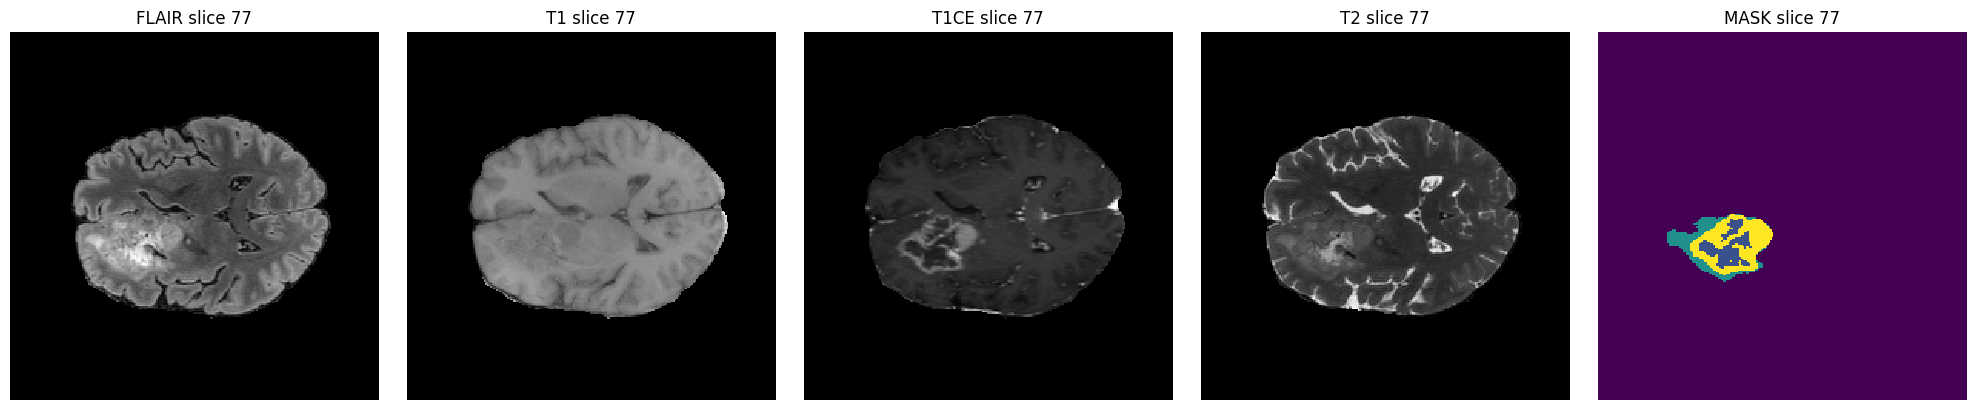

In [7]:

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_case_slices(preproc_root, case_id, modalities):
    """
    preproc_root: preproc 폴더 (예: '../data/btp_preproc_test' 또는 '../data/brats21_preproc')
    case_id:       케이스 폴더 이름 (예: 'PGBM-001' or 'BraTS2021_00000')
    modalities:   ['flair','t1','mask'] 혹은 ['flair','t1','t1ce','t2','mask'] 등
    """
    # 파일 경로 딕셔너리
    fpaths = {
        m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
        for m in modalities
    }
    # 중간 슬라이스 인덱스 계산 (Z축 중앙)
    sample_img = nib.load(list(fpaths.values())[0]).get_fdata()
    z = sample_img.shape[2] // 2
    
    # 플롯
    plt.figure(figsize=(4*len(modalities), 4))
    for i, m in enumerate(modalities, 1):
        data = nib.load(fpaths[m]).get_fdata()
        ax = plt.subplot(1, len(modalities), i)
        cmap = 'gray' if m!='mask' else 'viridis'
        ax.imshow(data[:,:,z], cmap=cmap, interpolation='none', aspect='equal')
        ax.set_title(f"{m.upper()} slice {z}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# ────────────────────────────────────────────────
# 2) BraTS21 데이터셋 예시
brats_root = "../data/brats21_preproc"      # 실제 위치에 맞춰 조정!
brats_case = "BraTS2021_00000"
show_case_slices(brats_root, brats_case, ["flair","t1","t1ce","t2","mask"])


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


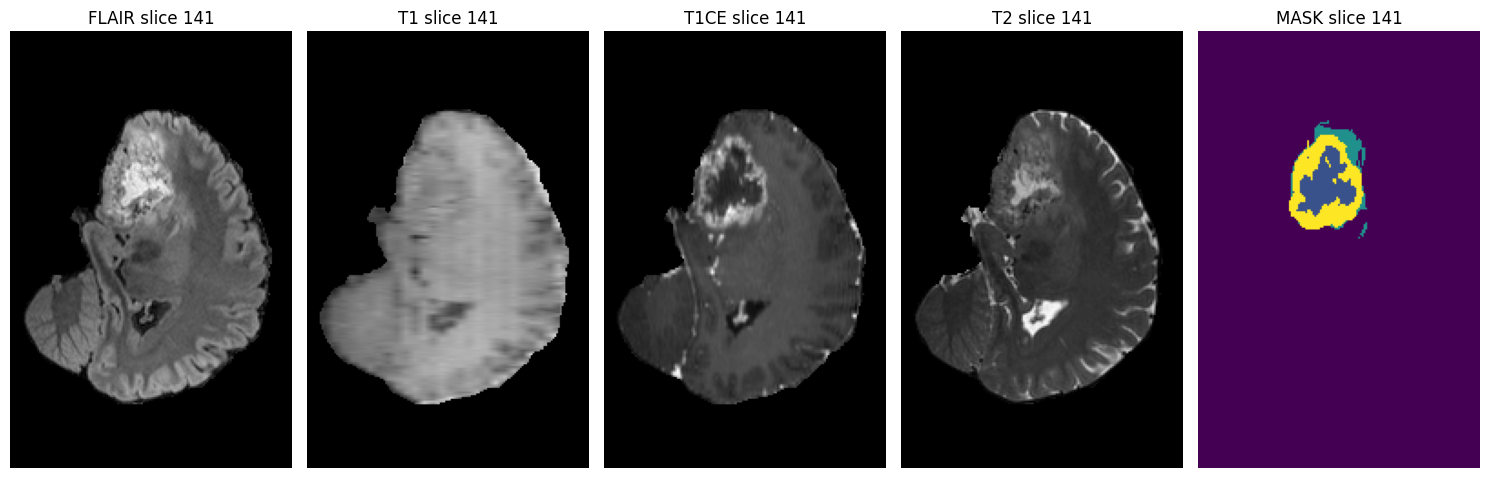

In [4]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/brats21_preproc"
case_id      = "BraTS2021_00000"

# 1) 경로
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1","t1ce","t2","mask"]
}

# 2) 슬라이스 방향 배열(shape) 확인
for mod, path in fpath_dict.items():
    arr = nib.load(path).get_fdata()
    print(f"{mod} shape:", arr.shape)
# 출력: flair (24, 320, 260), etc.

# 3) 마스크가 포함된 슬라이스 인덱스 중간(z0) 찾기
mask_arr = nib.load(fpath_dict["mask"]).get_fdata()
zs = np.where(mask_arr.sum(axis=(1,2)) > 0)[0]  # (slice,height,width) 이므로 axis=(1,2)
if len(zs)==0:
    raise RuntimeError("Mask is empty!")
z0 = zs[len(zs)//2]

# 4) 그리기
fig, axs = plt.subplots(1, 5, figsize=(15,5))
for ax, mod in zip(axs, ["flair","t1","t1ce","t2","mask"]):
    arr = nib.load(fpath_dict[mod]).get_fdata()
    slice_img = arr[z0, :, :]   # <-- (slice, H, W) 순서에 맞게!

    ax.imshow(slice_img,
              cmap="gray" if mod!="mask" else "viridis",
              aspect="equal")          # auto로 하면 화면 꽉 채워서 보기 좋음
    ax.set_title(f"{mod.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()


=== Shapes (Z, H, W) ===
flair: (240, 240, 155)
t1   : (240, 240, 155)
t1ce : (240, 240, 155)
t2   : (240, 240, 155)
mask : (240, 240, 155)

Using slice index z0 = 141 



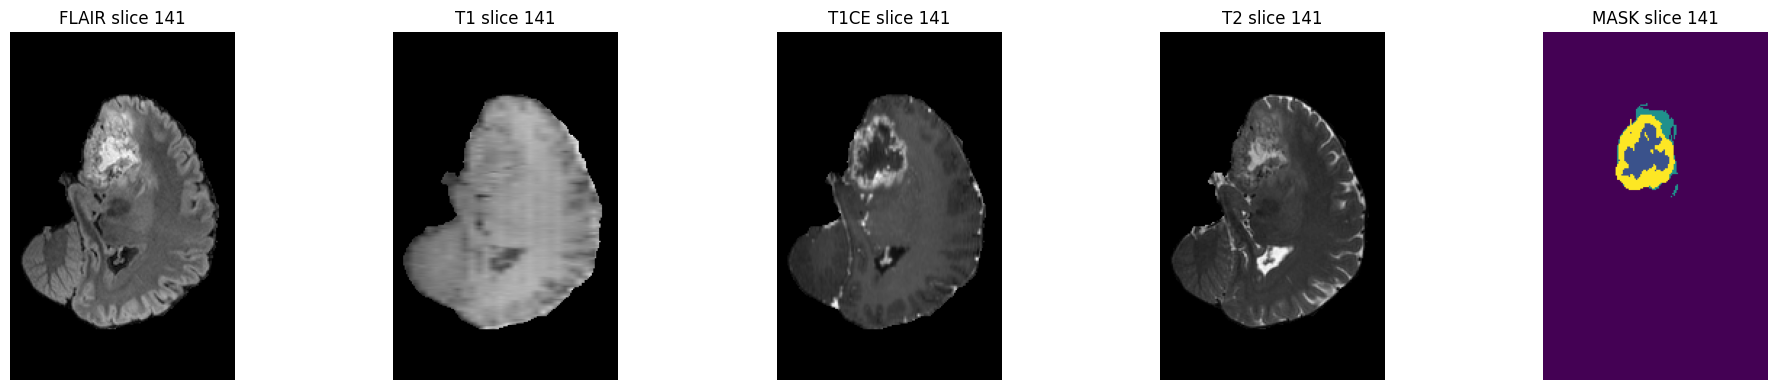

In [6]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────
# 1) 설정: preproc 루트, 케이스 아이디, modality 리스트
preproc_root = "../data/brats21_preproc"       # 실제 경로에 맞춰 조정
case_id      = "BraTS2021_00000"               # 예시 케이스
modalities   = ["flair","t1","t1ce","t2","mask"]

# 2) 파일 경로 딕셔너리 생성
#    mask 만 '_seg.nii.gz' 이니 별도 처리
fpath_dict = {}
for m in modalities:
    fname = f"{m}.nii.gz"
    fpath_dict[m] = os.path.join(preproc_root, case_id, fname)

# 3) shape 출력 (Z, H, W)
print("=== Shapes (Z, H, W) ===")
for m, p in fpath_dict.items():
    arr = nib.load(p).get_fdata()
    print(f"{m:5s}:", arr.shape)
print()

# 4) 마스크가 있는 슬라이스 인덱스 중간(z0) 계산
mask_arr = nib.load(fpath_dict["mask"]).get_fdata()
zs = np.where(mask_arr.sum(axis=(1,2)) > 0)[0]
if len(zs)==0:
    # 마스크가 비어있다면 그냥 중간 슬라이스
    sample = nib.load(fpath_dict[modalities[0]]).get_fdata()
    z0 = sample.shape[0] // 2
else:
    z0 = zs[len(zs)//2]
print("Using slice index z0 =", z0, "\n")

# 5) 시각화
n = len(modalities)
fig, axs = plt.subplots(1, n, figsize=(4*n, 4))
for ax, m in zip(axs, modalities):
    arr = nib.load(fpath_dict[m]).get_fdata()
    slice_img = arr[z0, :, :]            # (Z, H, W) 에서 가운데 Z 슬라이스
    cmap = "gray" if m!="mask" else "viridis"
    ax.imshow(slice_img, cmap=cmap, aspect="equal")
    ax.set_title(f"{m.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()


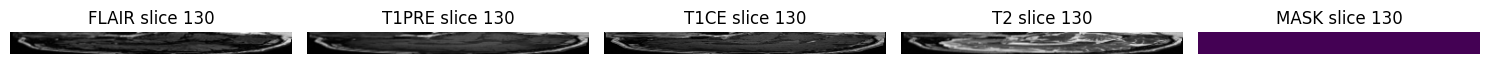

In [9]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/btp_preproc_full"
case_id      = "PGBM-001"

# 1) 파일 경로 딕셔너리
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1pre","t1ce","t2","mask"]
}

# 2) sample 로 중간 slice 인덱스 계산
sample = nib.load(fpath_dict["flair"]).get_fdata()  # (X, Y, Z)
z0 = sample.shape[2] // 2

# 3) 똑같은 방식을 쓰도록 slice_img 추출 축을 통일합니다!
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
for ax, m in zip(axs, ["flair","t1pre","t1ce","t2","mask"]):
    data = nib.load(fpath_dict[m]).get_fdata()  # (X, Y, Z)
    slice_img = data[:, :, z0]                  # <-- 이 한 줄이 포인트!

    ax.imshow(slice_img,
              cmap="gray" if m!="mask" else "viridis",
              aspect="equal")      # 픽셀 비율 1:1 고정
    ax.set_title(f"{m.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()


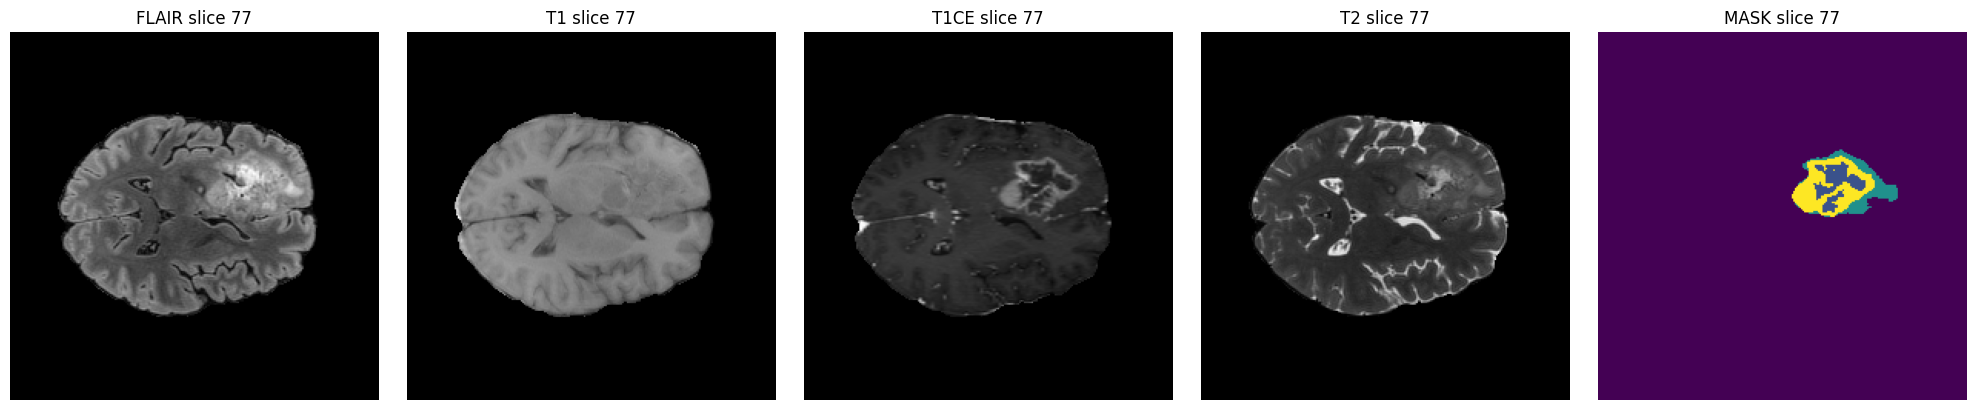

In [16]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}

    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc_rotated"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)


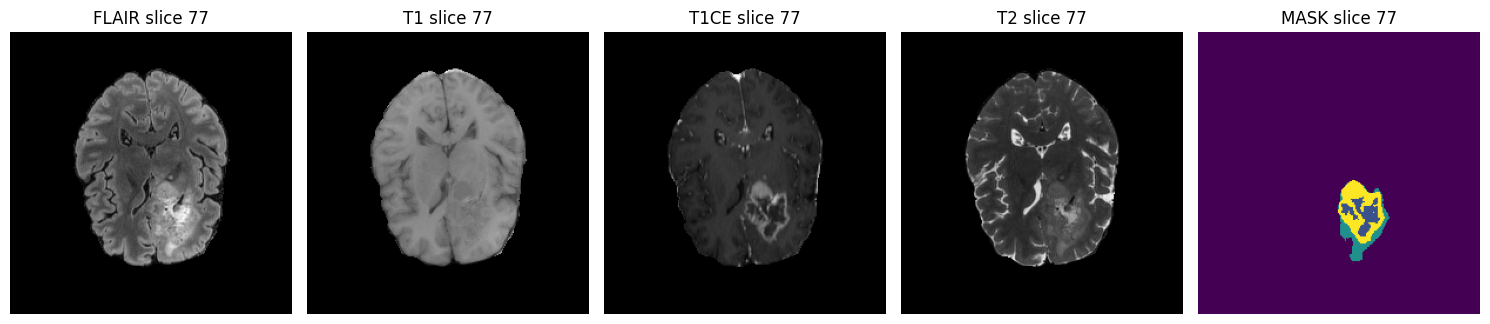

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


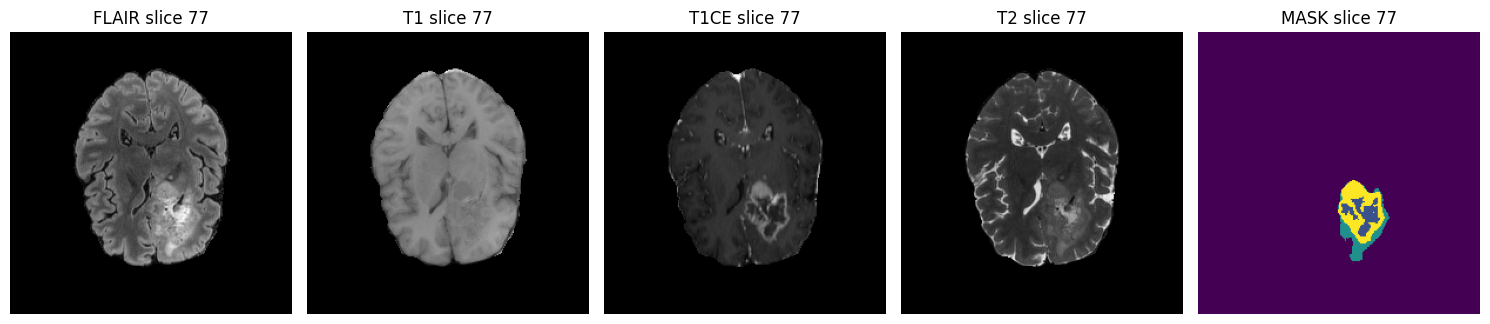

In [23]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 슬라이스 방향 배열(shape) 확인
    for mod, path in fpath.items():
        arr = nib.load(path).get_fdata()
        print(f"{mod} shape:", arr.shape)
    # 출력: flair (24, 320, 260), etc.
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)


flair shape: (240, 256, 256)
t1 shape: (240, 256, 256)
t1ce shape: (240, 256, 256)
t2 shape: (240, 256, 256)
mask shape: (240, 256, 256)


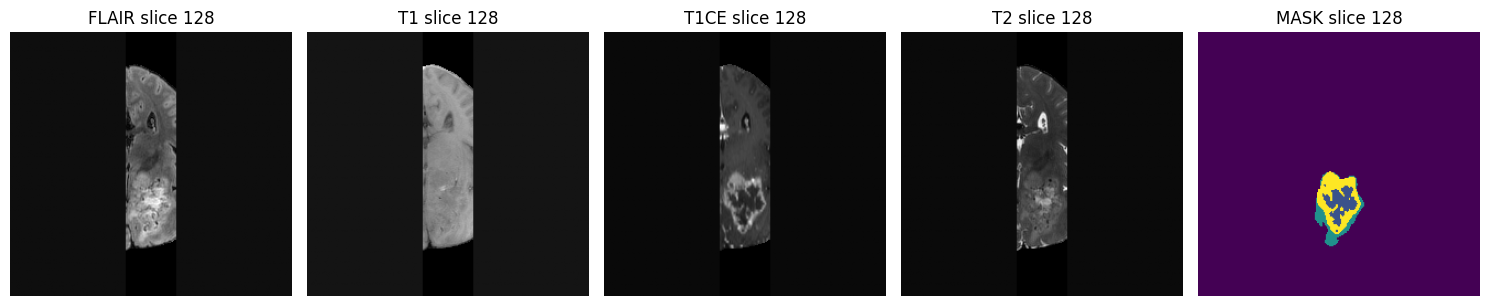

In [24]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 슬라이스 방향 배열(shape) 확인
    for mod, path in fpath.items():
        arr = nib.load(path).get_fdata()
        print(f"{mod} shape:", arr.shape)
    # 출력: flair (24, 320, 260), etc.
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc_new"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


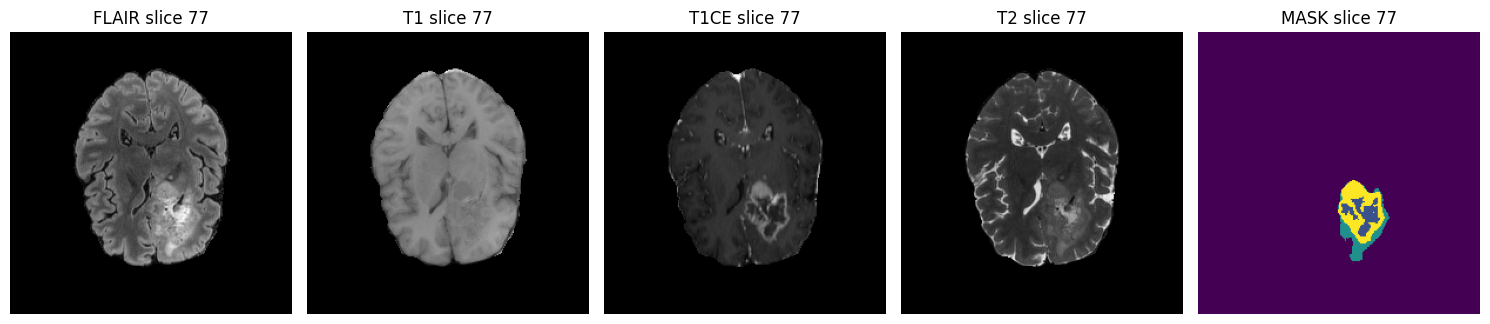

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 슬라이스 방향 배열(shape) 확인
    for mod, path in fpath.items():
        arr = nib.load(path).get_fdata()
        print(f"{mod} shape:", arr.shape)
    # 출력: flair (24, 320, 260), etc.
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)

flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


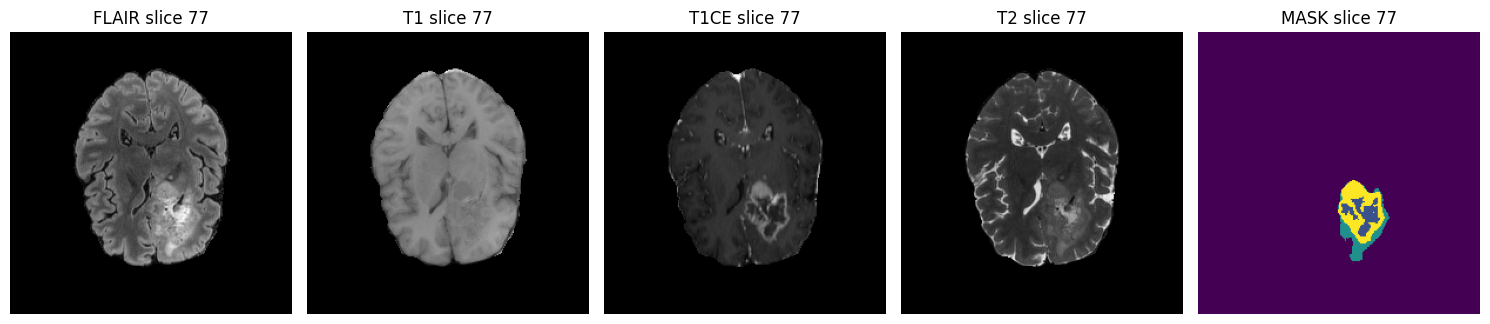

In [26]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 슬라이스 방향 배열(shape) 확인
    for mod, path in fpath.items():
        arr = nib.load(path).get_fdata()
        print(f"{mod} shape:", arr.shape)
    # 출력: flair (24, 320, 260), etc.
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc_new"
brats_case = "BraTS2021_00000"
show_brats_case(brats_root, brats_case)

flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


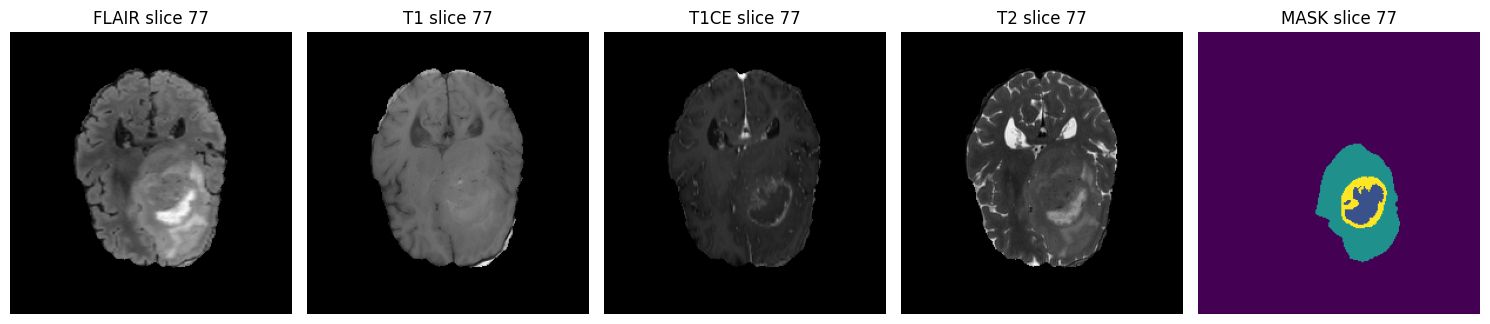

In [54]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_brats_case(preproc_root, case_id, mods=None):
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]
    # 1) 경로 딕셔너리
    fpath = {m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
             for m in mods}
    
    # 슬라이스 방향 배열(shape) 확인
    for mod, path in fpath.items():
        arr = nib.load(path).get_fdata()
        print(f"{mod} shape:", arr.shape)
    # 출력: flair (24, 320, 260), etc.
    
    # 2) 중간 Z 인덱스
    sample = nib.load(fpath[mods[0]]).get_fdata()    # shape = (X, Y, Z)
    z0 = sample.shape[2] // 2

    # 3) plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for ax, m in zip(axs, mods):
        data = nib.load(fpath[m]).get_fdata()
        slice_img = data[:, :, z0]                    # ← BraTS21 은 여기가 맞아요!

        ax.imshow(slice_img,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# 사용 예
brats_root = "../data/brats21_preproc_new"
brats_case = "BraTS2021_00002"
show_brats_case(brats_root, brats_case)